# 1.分析微信群数据

                    nickname hanglei1        time  time2 shou chu shoudai  \
0        泰州圆慧袁铿1号18852659752       中介  2019-06-04  16:25    1   0       0   
1                       小鱼儿🐠       中介  2019-06-04  17:08    0   0       0   
2        泰州圆慧袁铿1号18852659752       中介  2019-06-04  18:02    1   0       0   
3      陈玉晓15976830965【腾隆信金融】       中介  2019-06-05  07:35    1   0       0   
4                    任丘联社孙建平       农商  2019-06-05  08:19    0   1       0   
5        泰州圆慧袁铿1号18852659752       中介  2019-06-05  08:29    1   0       0   
6        泰州圆慧袁铿1号18852659752       中介  2019-06-05  10:33    1   0       0   
7        泰州圆慧袁铿1号18852659752       中介  2019-06-05  12:37    1   0       0   
8        泰州圆慧袁铿1号18852659752       中介  2019-06-05  14:12    1   0       0   
9        泰州圆慧袁铿1号18852659752       中介  2019-06-05  17:38    1   0       0   
10       泰州圆慧袁铿1号18852659752       中介  2019-06-06  11:28    1   0       0   
11        商票  常明坤15538100098       中介  2019-06-11  08:18    0   0       0   

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


        收票   出票
sheng          
上海      39   97
云南       6   21
内蒙古      1   33
北京      23   13
吉林       4    2
哈尔滨     18    0
四川       7    2
天津      27   73
宁夏      22    2
安徽      15   30
山东      96  114
山西      67   86
广东     150  159
广西       5    7
新疆      13    3
江苏     125  239
江西      10   19
沈阳       4   16
河北      71   71
河南      35   68
浙江      44  111
海南       7    3
深圳      33   34
湖北       4   12
湖南      42   26
甘肃       9    9
福建      57   78
西安      10   22
贵州      22   27
辽宁      14    9
重庆       1    9
陕西      14   15
青海       1    0
黑龙江     14   13


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
No handles with labels found to put in legend.


             收票   出票
time                
2019-06-03   88  203
2019-06-04  131  171
2019-06-05  136  176
2019-06-06   73  108
2019-06-07    1    0
2019-06-10  130  171
2019-06-11  140  159
2019-06-12  141  190
2019-06-13  117  167
2019-06-14  118  166
2019-06-17  162  280
2019-06-18  230  321
2019-06-19  162  259
2019-06-20  163  231
2019-06-21  217  241
2019-06-24  218  299
2019-06-25  104  145
2019-06-26  108  174
2019-06-27  139  205
2019-06-28   87  103


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


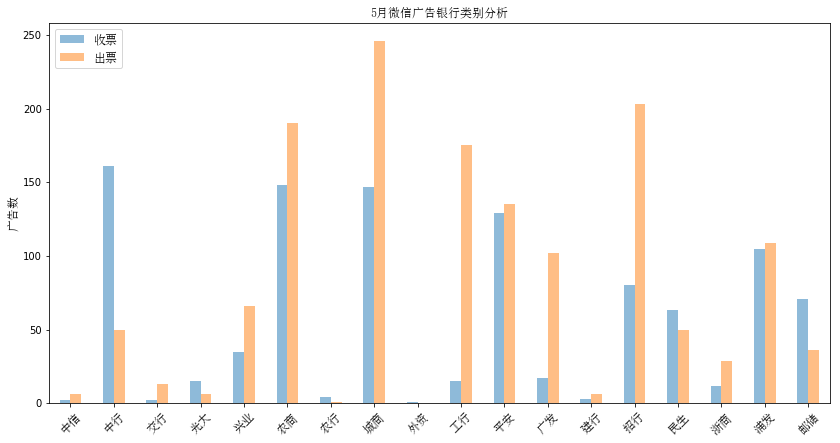

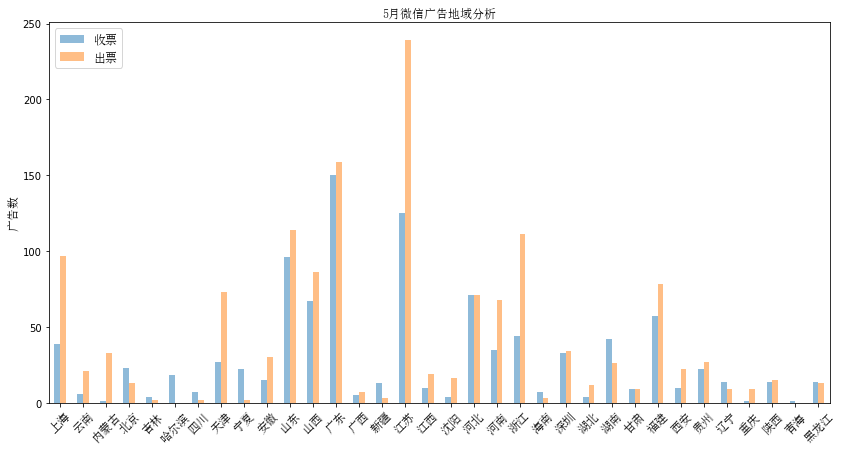

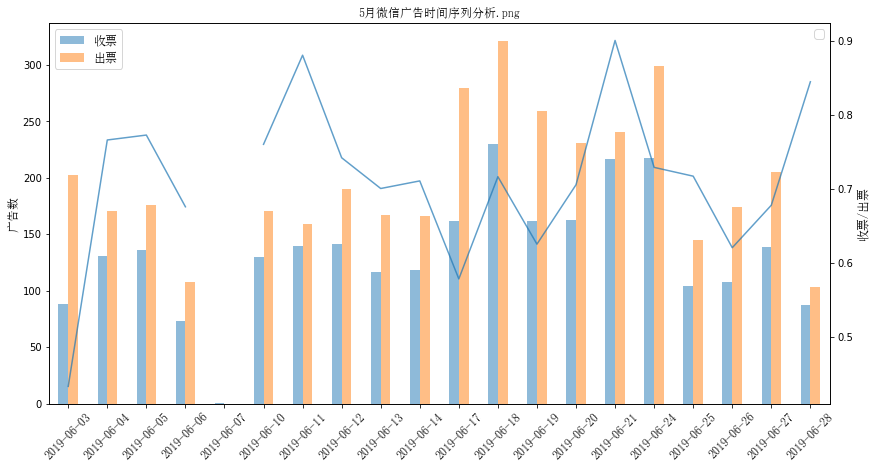

# 分析票交所数据

## 累计数据

In [6]:
from pymongo import MongoClient
import pandas as pd

client=MongoClient('mongodb://root:' + '5768116' + '@121.196.220.14')
db = client.piaojiaosuo2         #得到数据库
collection = db.piaojiaosuo2      #得到数据集合
cursor = collection.find()#
piaofen3 = pd.DataFrame(list(cursor))

piaofen3=piaofen3[piaofen3['数据']=='累计']
    
piaofen3['提取日期'] = pd.to_datetime(piaofen3['提取日期']).astype('str')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
piaofen3['承兑金额/亿元'] =piaofen3['承兑金额/亿元'].astype('float')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
piaofen3['交易金额/亿元'] =piaofen3['交易金额/亿元'].astype('float')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
piaofen3['贴现金额/亿元'] =piaofen3['贴现金额/亿元'].astype('float')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式

piaofen4=piaofen3[['提取日期','交易笔数/笔','交易金额/亿元','承兑张数/张',
                   '承兑金额/亿元','贴现张数/张','贴现金额/亿元']]
piaofen4 = piaofen4.sort_values(by=['提取日期'], ascending=True)

import arrow
piaofen5=piaofen4.reset_index(drop = True)
#print(piaofen5)
for i in range(0,len(piaofen5)):
    #print(piaofen4.loc[i,'提取日期'])
    piaofen5.loc[i,'日期']=arrow.get(piaofen5.loc[i,'提取日期']).day
    piaofen5.loc[i,'月份']= arrow.get(piaofen5.loc[i,'提取日期']).month
    piaofen5.loc[i,'年份']= arrow.get(piaofen5.loc[i,'提取日期']).year
    piaofen5.loc[i,'月份2']= str(arrow.get(piaofen5.loc[i,'提取日期']).month)
    piaofen5.loc[i,'年份2']=str( arrow.get(piaofen5.loc[i,'提取日期']).year)

    
test6= piaofen5.groupby([piaofen5['年份'],piaofen5['月份']]).max()

test7= piaofen5.groupby([piaofen5['年份'],piaofen5['月份']]).size()
test6=pd.concat([test6,test7],axis=1)
test6.rename(columns={0:'工作日'}, inplace=True)



test6=test6.reset_index(drop = False)
for i in range(1,len(test6)):
    if test6.loc[i,'月份']==1.0:
        test6.loc[i,'当月承兑量']=test6.loc[i,'承兑金额/亿元']
        test6.loc[i,'当月交易量']=test6.loc[i,'交易金额/亿元']
        test6.loc[i,'当月贴现量']=test6.loc[i,'贴现金额/亿元']
        
        
    else:
        test6.loc[i,'当月承兑量']=test6.loc[i,'承兑金额/亿元']-test6.loc[i-1,'承兑金额/亿元']
        test6.loc[i,'当月交易量']=test6.loc[i,'交易金额/亿元']-test6.loc[i-1,'交易金额/亿元']
        test6.loc[i,'当月贴现量']=test6.loc[i,'贴现金额/亿元']-test6.loc[i-1,'贴现金额/亿元']
        
test6['日均承兑金额/亿元']=test6['当月承兑量']/test6['工作日']
test6['日均贴现金额/亿元']=test6['当月贴现量']/test6['工作日']
test6['日均交易金额/亿元']=test6['当月交易量']/test6['工作日']
test6=test6.round({'日均承兑金额/亿元': 2, '日均贴现金额/亿元': 2,'日均交易金额/亿元':2,'年份':0})
test6['月']=test6['年份2']+'/'+test6['月份2']

test6=test6[['月','当月承兑量','当月贴现量','当月交易量','日均承兑金额/亿元','日均贴现金额/亿元','日均交易金额/亿元','工作日','提取日期']]


print(test6)
test6.to_excel('tongji22.xls')

          月     当月承兑量     当月贴现量     当月交易量  日均承兑金额/亿元  日均贴现金额/亿元  日均交易金额/亿元  \
0    2018/2       NaN       NaN       NaN        NaN        NaN        NaN   
1    2018/3   1295.90    790.74   6549.60    1295.90     790.74    6549.60   
2    2018/4  27001.30  13621.09  76050.32    1800.09     908.07    5070.02   
3    2018/5  14094.79   6889.77  28359.20     640.67     313.17    1289.05   
4    2018/6  15110.74   8439.98  30931.84     755.54     422.00    1546.59   
5    2018/7  13767.97   7937.54  36433.18     688.40     396.88    1821.66   
6    2018/8  17020.63  10242.86  38684.30     740.03     445.34    1681.93   
7    2018/9  16029.21   8759.94  29283.90     763.30     417.14    1394.47   
8   2018/10  13137.06   7145.99  26371.21     729.84     397.00    1465.07   
9   2018/11  16907.59  10222.21  35694.06     768.53     464.65    1622.46   
10  2018/12  21223.71  12214.34  38303.05    1010.65     581.64    1823.95   
11   2019/1  25529.59  16866.13  58906.66    1160.44     766.64 

## 当日数据 

             index   交易金额/亿元   承兑金额/亿元   贴现金额/亿元     日期  工作日  日均承兑金额/亿元  \
年份     月份                                                                 
2018.0 2.0     225  17361.95   6586.12   3014.48  165.0   10     658.61   
       3.0      28   1559.57    440.43    262.62    5.0    1     440.43   
       4.0     745  31299.93   9625.58   4750.95  238.0   15     641.71   
       5.0    1581  27380.42  14506.19   6984.53  367.0   22     659.37   
       6.0    2480  30931.82  15077.43   8437.28  313.0   20     753.87   
       7.0    4914  33924.98  13193.15   7569.59  318.0   20     659.66   
       8.0    6740  37229.63  16327.04   9860.10  376.0   23     709.87   
       9.0    6846  29283.87  15986.17   8753.12  345.0   21     761.25   
       10.0   6219  26355.15  13096.64   7143.79  345.0   18     727.59   
       11.0   8041  35682.49  16879.51  10220.54  355.0   22     767.25   
       12.0   8127  38303.05  21174.64  12208.40  339.0   21    1008.32   
2019.0 1.0    9032  58906

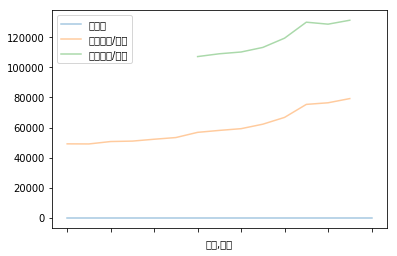

In [21]:
#coding=utf-8
import time,re
import pandas as pd
from pymongo import MongoClient
from docx import Document
from docx.shared import Pt
from docx.shared import Inches
from docx.oxml.ns import qn
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import arrow
import numpy
document = Document()
shijian=time.strftime('%Y-%m-%d',time.localtime(time.time()))
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=8) #用于在散点图中输出中文

client=MongoClient('mongodb://root:' + '5768116' + '@121.196.220.14')
import matplotlib.pyplot as plt

db = client.piaojiaosuo2         #得到数据库
collection = db.piaojiaosuo2      #得到数据集合
cursor = collection.find()#
piaofen3 = pd.DataFrame(list(cursor))

piaofen3=piaofen3[piaofen3['数据']=='当日']
piaofen3['提取日期'] = pd.to_datetime(piaofen3['提取日期']).astype('str')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
piaofen3=piaofen3[['提取日期','交易笔数/笔','交易金额/亿元','承兑张数/张',
                   '承兑金额/亿元','贴现张数/张','贴现金额/亿元',
                   '承兑余额/亿元','累计已承兑未结清/张',
                  '托管余额/亿元','托管余额张数/张',
                   '贴现余额/亿元','累计已贴现未结清/张'
                  ]]
piaofen3 = piaofen3.sort_values(by=['提取日期'], ascending=True)

piaofen3=piaofen3.reset_index(drop = False)

piaofen3['承兑金额/亿元']=piaofen3['承兑金额/亿元'].astype(float)
piaofen3['贴现金额/亿元']=piaofen3['贴现金额/亿元'].astype(float)
piaofen3['交易金额/亿元']=piaofen3['交易金额/亿元'].astype(float)


for i in range(0,len(piaofen3)):
    #print(piaofen4.loc[i,'提取日期'])
    piaofen3.loc[i,'日期']=arrow.get(piaofen3.loc[i,'提取日期']).day
    piaofen3.loc[i,'月份']= arrow.get(piaofen3.loc[i,'提取日期']).month
    piaofen3.loc[i,'年份']= arrow.get(piaofen3.loc[i,'提取日期']).year


test6= piaofen3.groupby([piaofen3['年份'],piaofen3['月份']]).sum()

test7= piaofen3.groupby([piaofen3['年份'],piaofen3['月份']]).size()
test6=pd.concat([test6,test7],axis=1)
test6.rename(columns={0:'工作日'}, inplace=True)


#test6=test6.reset_index(drop = False)

test6['日均承兑金额/亿元']=test6['承兑金额/亿元']/test6['工作日']
test6['日均贴现金额/亿元']=test6['贴现金额/亿元']/test6['工作日']
test6['日均交易金额/亿元']=test6['交易金额/亿元']/test6['工作日']


test6=test6.round({'日均承兑金额/亿元': 2, '日均贴现金额/亿元': 2,'日均交易金额/亿元':2})

    
print(test6)
test6.to_excel('日报.xls')    
#接下来是余额，已经被票交所废弃
for i in range(0,len(piaofen3)):
    if piaofen3.loc[i,'贴现余额/亿元'] is None:
           piaofen3.loc[i,'贴现余额/亿元'] =piaofen3.loc[i,'托管余额/亿元'] 
            
print(piaofen3)            
piaofen3.to_csv('ddd3.csv')
        
test8= piaofen3['日期'].groupby([piaofen3['年份'],piaofen3['月份']]).max()
test8=test8.reset_index(drop = False)
for i in range(0,len(piaofen3)):
    for j in range(0,len(test8)):
        if (piaofen3.loc[i,'年份']==test8.loc[j,'年份']) and (piaofen3.loc[i,'月份']==test8.loc[j,'月份'] ) and  (piaofen3.loc[i,'日期']==test8.loc[j,'日期']):
            piaofen3.loc[i,'月末日']=1
            break


piaofen3=piaofen3.set_index(['提取日期'])
piaofen3=piaofen3.reset_index(drop = False)

piaofen3['贴现余额/亿元']=piaofen3['贴现余额/亿元'].astype(float)
piaofen3['承兑余额/亿元']=piaofen3['承兑余额/亿元'].astype(float)
piaofen3=piaofen3[['提取日期','月末日','年份','月份','贴现余额/亿元','承兑余额/亿元']]
piaofen3=piaofen3[piaofen3['月末日']==1]
piaofen3=piaofen3.set_index(['年份','月份'])

print(piaofen3)
piaofen3.plot(kind='line', alpha=0.4)
plt.show
zong=pd.concat([test6,piaofen3],axis=1)
zong=zong.reset_index(drop = False)
zong.to_csv('ddd2.csv')

#